# Predicting Fraud Mobile Money Transactions

## 1. Preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1.1 Data importation and basic data description

In [2]:
df = pd.read_csv("C://Users//lenovo//Desktop//fraud detection.csv",header=0)
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


There are 6,362,619 datas in this dataset. There are 11 variables in total and the variable called 'isFraud' is target varible. I want to find out the most satisfying classification method to maximize the accuracy of predition.

In [3]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [4]:
fraud = pd.value_counts(df['isFraud'], sort = True).sort_index()
fraud

0    6354407
1       8213
Name: isFraud, dtype: int64

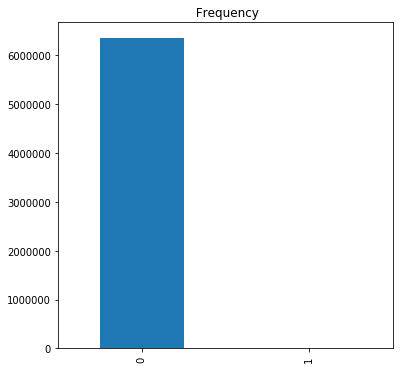

In [5]:
fraud.plot(kind='bar', title=" Frequency",figsize=(6,6))
plt.show()

The dataset is imbalanced with 6,354,407 not fraud and 8,213 fraud transactions.Thus,99.87% of transactions are not fraud.

### 1.2 Data preprocessing

#### 1.2.1 Test missing data

In [6]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

There is no missing value in the dataset.

#### 1.2.2 Encoding class labels

As variable "type" is in the form of string, I firstly transfer it into class labels.

In [7]:
class_mapping = {label:idx for idx,label in enumerate(np.unique(df['type']))}
class_mapping
{'CASH_IN': 0,'CASH_OUT': 1,'DEBIT': 2,'PAYMENT': 3, 'TRANSFER': 4}

{'CASH_IN': 0, 'CASH_OUT': 1, 'DEBIT': 2, 'PAYMENT': 3, 'TRANSFER': 4}

In [8]:
df['type'] = df['type'].map(class_mapping)
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,1,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,4,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,1,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,4,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,1,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


#### 1.2.3 Separating training and test sets

According to common sense, we know that names of customers who start or receive the transaction have no prediction power.And the variable "isFlaggedFraud" just specifies transaction larger than 0.2 million, which is a little bit repeated with the variable"amount". So I drop these three varibles in the dependent variable column. Independent variable is the variable "isFraud".
I separate training and test sets with propotion of 70:30.

In [9]:
from sklearn.model_selection import train_test_split
Xcolumns=['step','type','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']
X, y = df[Xcolumns].values, df['isFraud'].values
X_train, X_test, y_train, y_test =\
train_test_split(X, y,test_size=0.3,random_state=0,stratify=y)

#### 1.2.4 Standarization

The approach of atandarization is used to bring different feasures onto the same scale.

In [10]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

## 2. Model Selection

This chapter includes 3 parts.In the following models, linear discriminant analysis will be firstly used to find the feature subspace that optimizes class separability. And classification function with parameter of class weight will be set as “balanced” to deal with the problem caused by imbalanced data. Finally, 3 models are evaluated by accuracy and 1-FPR. I want to maximize TN/(FP+TN) so that when a transaction is a fraud, the transaction can be detected timely. As an improvement, stratified K-fold cross validation will be used to estimate their performances when faced with data has not been seen before.

### 2.1 Logistics Regression

Here, I use LogisticRegressionCV function instead of LogisticRegression because parameter C can be chosen by cross validation. And parameter class weight is set to be  balanced to deal with problem of class imbalance.

In [11]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegressionCV
from sklearn.pipeline import make_pipeline
pipe_lr = make_pipeline(LDA(n_components=2),LogisticRegressionCV(random_state=1,class_weight='balanced'))
pipe_lr.fit(X_train_std, y_train)
y_pred = pipe_lr.predict(X_test_std)
print('Test Accuracy: %.3f' % pipe_lr.score(X_test_std, y_test))

Test Accuracy: 0.948


Here，accuracy is 0.948

In [12]:
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[1807209   99113]
 [    530    1934]]


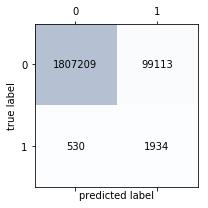

In [13]:
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i,
            s=confmat[i, j],
            va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

I want to maximize TN/(FP+TN) so that when a transaction is a fraud, the transaction can be detected timely. For logistics regression above, TN/(FP+TN)=1934/(530+1934)=0.7849

In [14]:
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=10,random_state=1).split(X_train_std,y_train)
scores = []
for k, (train, test) in enumerate(kfold):
    pipe_lr.fit(X_train_std[train], y_train[train])
    score = pipe_lr.score(X_train_std[test], y_train[test])
    scores.append(score)
    print('Fold: %2d, Class dist.: %s, Acc: %.3f' % (k+1,
        np.bincount(y_train[train]), score))
print('\nCV accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

Fold:  1, Class dist.: [4003276    5174], Acc: 0.948
Fold:  2, Class dist.: [4003276    5174], Acc: 0.948
Fold:  3, Class dist.: [4003276    5174], Acc: 0.948
Fold:  4, Class dist.: [4003276    5174], Acc: 0.948
Fold:  5, Class dist.: [4003276    5174], Acc: 0.948
Fold:  6, Class dist.: [4003277    5174], Acc: 0.948
Fold:  7, Class dist.: [4003277    5174], Acc: 0.948
Fold:  8, Class dist.: [4003277    5174], Acc: 0.948
Fold:  9, Class dist.: [4003277    5174], Acc: 0.948
Fold: 10, Class dist.: [4003277    5175], Acc: 0.947

CV accuracy: 0.948 +/- 0.000


### 2.2 Random Forest

In [15]:
from sklearn.ensemble import RandomForestClassifier
pipe_forest = make_pipeline(LDA(n_components=2),RandomForestClassifier(criterion='gini',class_weight='balanced'))
pipe_forest.fit(X_train_std,y_train)
y_pred =pipe_forest.predict(X_test_std)
print('Test Accuracy: %.3f' % pipe_forest.score(X_test_std, y_test))

Test Accuracy: 0.998


Test accuracy is 0.998 for random forest.

In [16]:
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[1904958    1364]
 [   1631     833]]


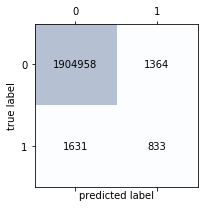

In [17]:
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i,
            s=confmat[i, j],
            va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

For random forest above, TN/(FP+TN)=840/(1624+840)=0.3409, which is very low.

In [19]:
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=10,random_state=1).split(X_train_std,y_train)
scores = []
for k, (train, test) in enumerate(kfold):
    pipe_forest.fit(X_train_std[train], y_train[train])
    score = pipe_forest.score(X_train_std[test], y_train[test])
    scores.append(score)
    print('Fold: %2d, Class dist.: %s, Acc: %.3f' % (k+1,
        np.bincount(y_train[train]), score))
print('\nCV accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

Fold:  1, Class dist.: [4003276    5174], Acc: 0.998
Fold:  2, Class dist.: [4003276    5174], Acc: 0.998
Fold:  3, Class dist.: [4003276    5174], Acc: 0.998
Fold:  4, Class dist.: [4003276    5174], Acc: 0.998
Fold:  5, Class dist.: [4003276    5174], Acc: 0.998
Fold:  6, Class dist.: [4003277    5174], Acc: 0.998
Fold:  7, Class dist.: [4003277    5174], Acc: 0.998
Fold:  8, Class dist.: [4003277    5174], Acc: 0.998
Fold:  9, Class dist.: [4003277    5174], Acc: 0.998
Fold: 10, Class dist.: [4003277    5175], Acc: 0.998

CV accuracy: 0.998 +/- 0.000


### 2.3 K-Nearest Neighbors(KNN)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
pipe_knn = make_pipeline(LDA(n_components=2),KNeighborsClassifier(n_neighbors=5))
pipe_knn.fit(X_train_std, y_train)
y_pred = pipe_knn.predict(X_test_std)
print('Test Accuracy: %.3f' % pipe_knn.score(X_test_std, y_test))

Test Accuracy: 0.999


Test accuracy is 0.999 for KNN.

In [21]:
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[1906108     214]
 [   1641     823]]


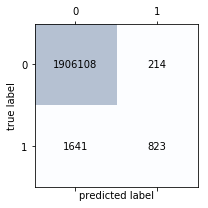

In [22]:
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i,
            s=confmat[i, j],
            va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

For KNN, TN/(FP+TN)=823/(1641+823)=0.3340, which is also very low.

In [23]:
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=10,random_state=1).split(X_train_std,y_train)
scores = []
for k, (train, test) in enumerate(kfold):
    pipe_knn.fit(X_train_std[train], y_train[train])
    score = pipe_knn.score(X_train_std[test], y_train[test])
    scores.append(score)
    print('Fold: %2d, Class dist.: %s, Acc: %.3f' % (k+1,
        np.bincount(y_train[train]), score))
print('\nCV accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

Fold:  1, Class dist.: [4003276    5174], Acc: 0.999
Fold:  2, Class dist.: [4003276    5174], Acc: 0.999
Fold:  3, Class dist.: [4003276    5174], Acc: 0.999
Fold:  4, Class dist.: [4003276    5174], Acc: 0.999
Fold:  5, Class dist.: [4003276    5174], Acc: 0.999
Fold:  6, Class dist.: [4003277    5174], Acc: 0.999
Fold:  7, Class dist.: [4003277    5174], Acc: 0.999
Fold:  8, Class dist.: [4003277    5174], Acc: 0.999
Fold:  9, Class dist.: [4003277    5174], Acc: 0.999
Fold: 10, Class dist.: [4003277    5175], Acc: 0.999

CV accuracy: 0.999 +/- 0.000


### 2.4 Conclusion

Comparing results above, we can see that test accuracy of logistics regression is the lowest,but it has the highest ratio of 1-False Positive rate.Considering its test accuracy is not so much lower and its 1-FPR is much higher than others, logistics regression has the most predictive power in this case.